In [1]:
import os, sys
THIS_DIR = os.path.abspath('')
PARENT_DIR = os.path.dirname(os.path.abspath(''))
sys.path.append(PARENT_DIR)

from datasets.datasets import RigidBodyDataset
from systems.billiards import Billiards, BilliardsDummyAnimation
from pytorch_lightning import seed_everything

import torch
import torch.nn as nn
import json
from trainer_billiards import Model

import matplotlib.animation as animation

seed_everything(0)

os.makedirs(os.path.join(PARENT_DIR, "figures"), exist_ok=True)
FIG_DIR = os.path.join(PARENT_DIR, "figures")

In [2]:
body = Billiards()
checkpoint_path = os.path.join(
    PARENT_DIR,
    "logs",
    "billiards",
    "version_0",
    "last.ckpt"
) 
model = Model.load_from_checkpoint(checkpoint_path)
init_cond = model.history[199]
print("the learned initial condition is: ", init_cond)

the learned initial condition is:  [[0.12431373 0.4455022 ]
 [0.48701915 0.03730413]]


In [3]:
model.initial_xy = nn.Parameter(torch.from_numpy(init_cond[0]))
model.initial_vxvy = nn.Parameter(torch.from_numpy(init_cond[1]))
model.eval()
zT, loss = model.test_step(None, None)

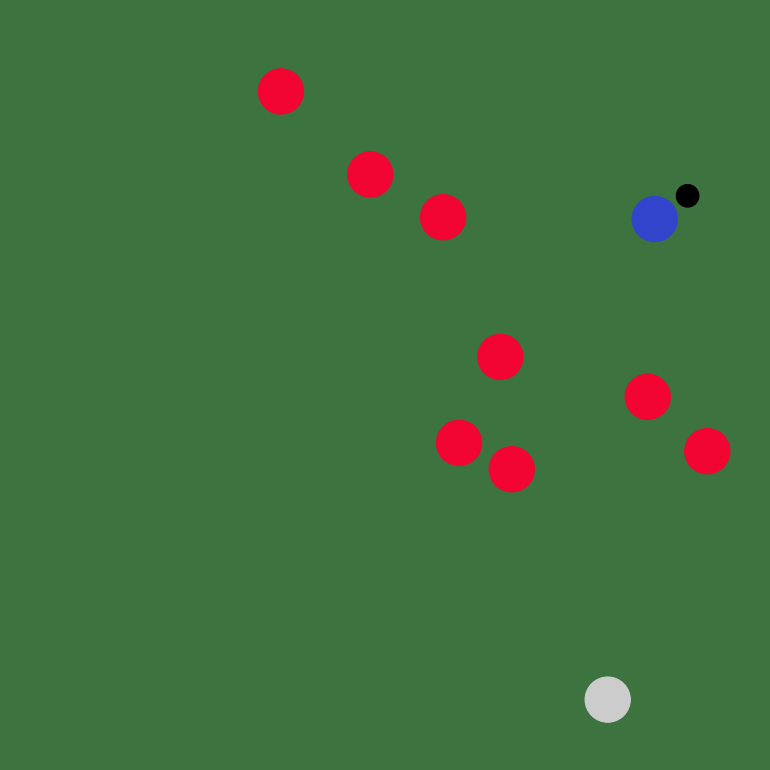

In [4]:
ani = body.animate(zT.reshape(1, -1, 2, 11, 2), 0)
writervideo = animation.FFMpegWriter(fps=60)
ani.save(os.path.join(FIG_DIR, f'downstream_billiards.gif'), writer=writervideo)